<a href="https://colab.research.google.com/github/ChiragSharmaa02/Linear-regression-Car-dekho-dataset/blob/main/Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [49]:
## Importing important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
df = pd.read_csv('/content/drive/MyDrive/Copy of car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [54]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

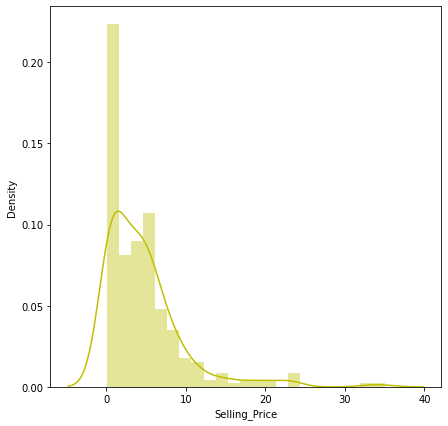

In [55]:
plt.figure(figsize=(7,7))
sns.distplot(df['Selling_Price'],color="y")

In [56]:
df['Car_Name'].unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [57]:
df['Car_Name'] = df['Car_Name'].replace({'ritz':'Maruti ritz', 'sx4':'Maruti sx4', 'ciaz':'Maruti ciaz', 'wagon r':'Maruti wagon r', 'swift':'Maruti swift', 'vitara brezza':'Maruti breeza',
       's cross':'Maruti s cross', 'alto 800':'Maruti alto', 'ertiga':'Maruti ertiga', 'dzire':'Maruti dzire', 'alto k10':'Maruti k10', 'ignis':'Maruti ignis',
       '800':'Maruti 800', 'baleno':'Maruti baleno', 'omni':'Maruti omni'})
df['Car_Name'] = df['Car_Name'].replace({ 'city' : 'Honda city', 'brio': 'Honda brio','amaze':'Honda amaze', 'jazz': 'Honda jazz','fortuner':'Toyota Fortuner', 'innova':'Toyota innova', 'corolla altis':'Toyota altis',
       'etios cross':'Toyota cross', 'etios g':'Toyota etios g', 'etios liva':'Toyota liva', 'corolla':'Toyota corolla', 'etios gd':'Toyota etios gd',
       'camry':'Toyota camry', 'land cruiser':'Toyota land cruiser'})

In [58]:
df['Car_Name'] = df['Car_Name'].replace({'grand i10':'Hyundai grand','i10':'Hyundai i10','i20':'Hyundai i20','eon':'Hyundai eon','xcent':'Hyundai xcent',
                                         'elantra':'Hyundaielantra','creta':'Hyundai creta','verna':'Hyundai verna'})


In [59]:
df['Car_Name'] = df['Car_Name'].replace({'Hyosung':'other Hyosung','Um':'other um','Suzuki':'other suzuki','Mahindra':'other mahindra'})


In [60]:

df['company'] = df['Car_Name'].str.split(" ", expand=True)[0]
df['company'] = df['company'].str.title()
df['company'].value_counts()

Honda             67
Toyota            50
Maruti            50
Hyundai           48
Bajaj             25
Royal             17
Hero              15
Yamaha             8
Tvs                8
Ktm                4
Activa             3
Hyundaielantra     2
Hyosung            1
Um                 1
Suzuki             1
Mahindra           1
Name: company, dtype: int64

In [61]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,company
0,Maruti ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,Maruti
1,Maruti sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,Maruti
2,Maruti ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,Maruti
3,Maruti wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,Maruti
4,Maruti swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,Maruti


In [62]:
df['Current year']= 2021
df['No_of_year']= df['Current year']-df['Year']

In [64]:
df.drop('Current year',axis=1,inplace=True)

In [66]:
num_df = df.describe().columns

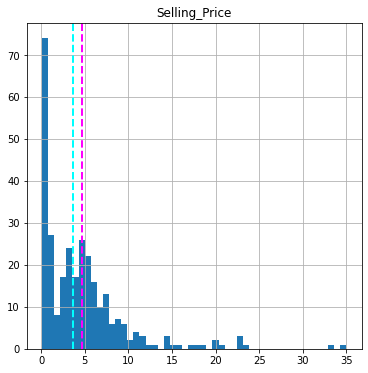

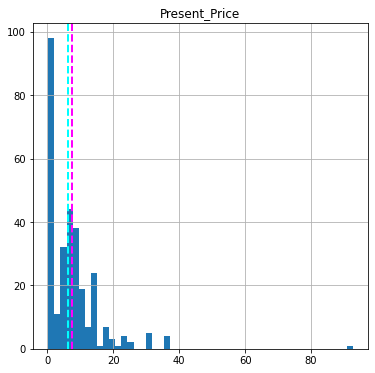

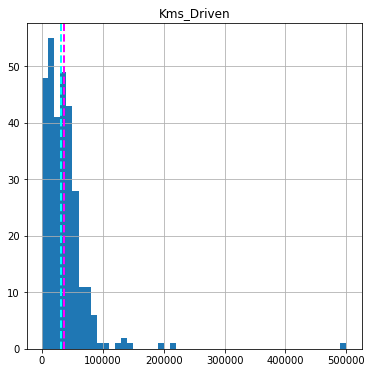

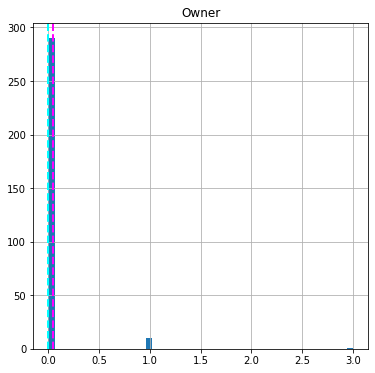

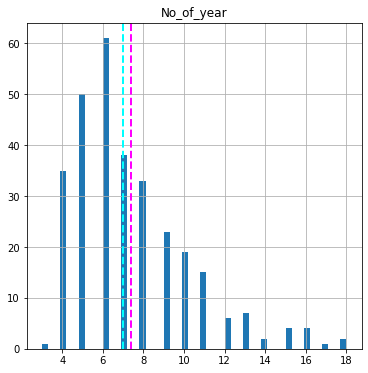

In [67]:
for col in num_df[1:]:
  fig = plt.figure(figsize=(6,6))
  ax = fig.gca()
  feature = df[col]
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)     
  ax.set_title(col)

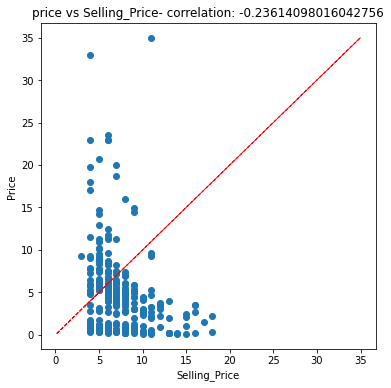

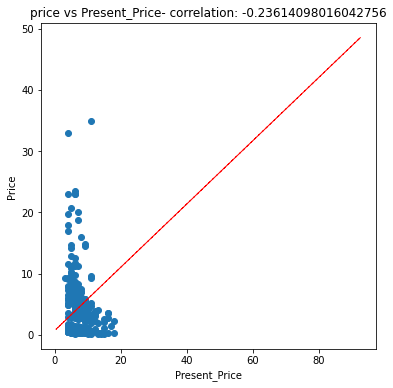

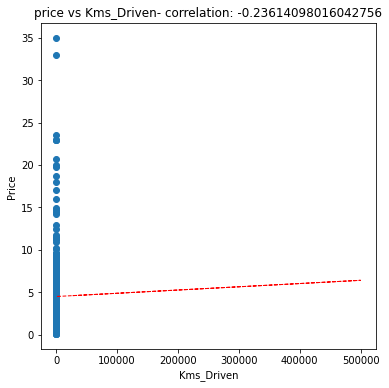

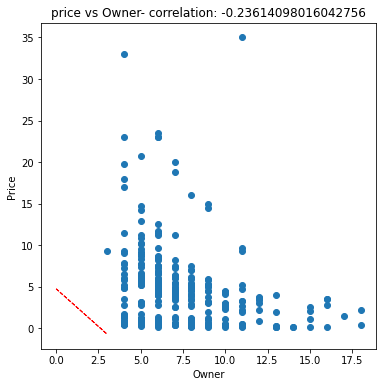

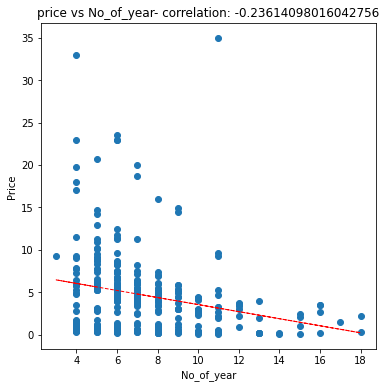

In [69]:
 for col in num_df[1:]:
  fig = plt.figure(figsize=(6,6))
  ax = fig.gca() 
  label = df['Selling_Price']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label)
  plt.xlabel(col)
  plt.ylabel('Price')
  ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
  z = np.polyfit(df[col], df['Selling_Price'], 1)
  y_hat = np.poly1d(z)(df[col])

  plt.plot(df[col], y_hat, "r--", lw=1) 

In [70]:
cat_df=df.describe(include = ['object','category']).columns


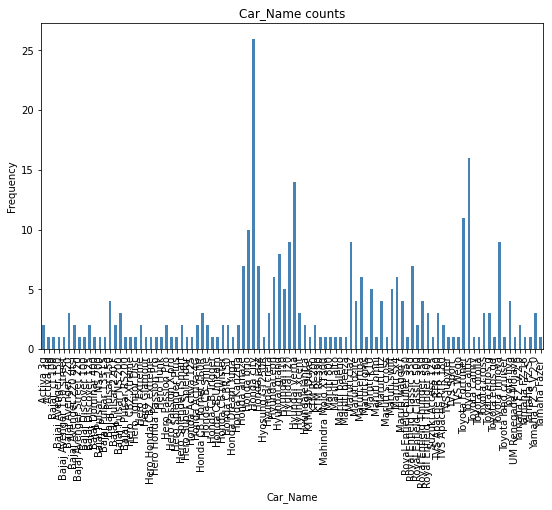

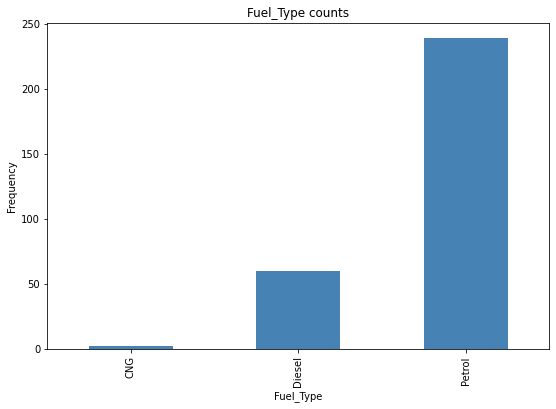

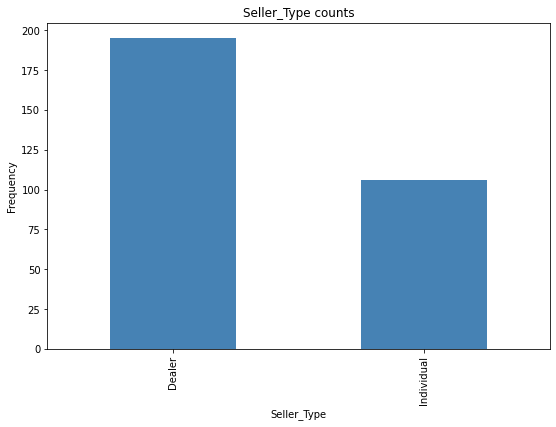

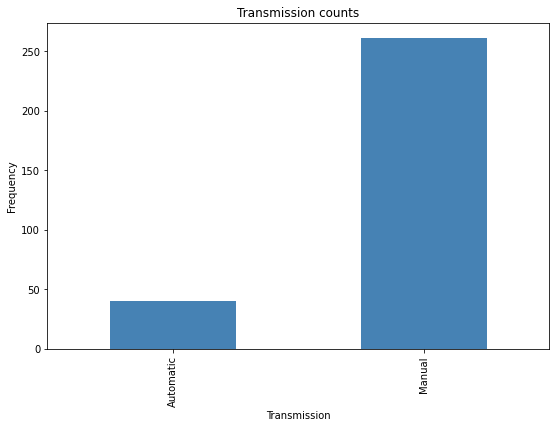

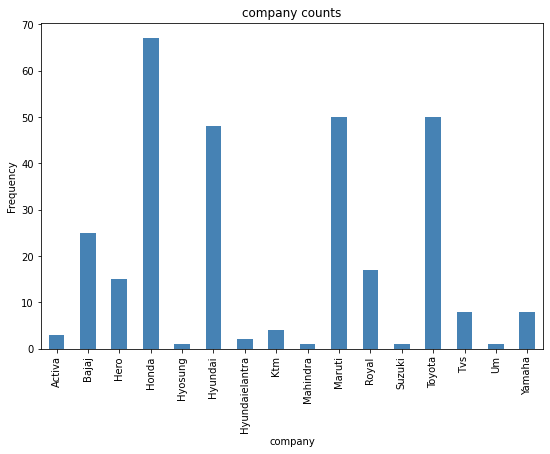

In [71]:
for col in cat_df:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

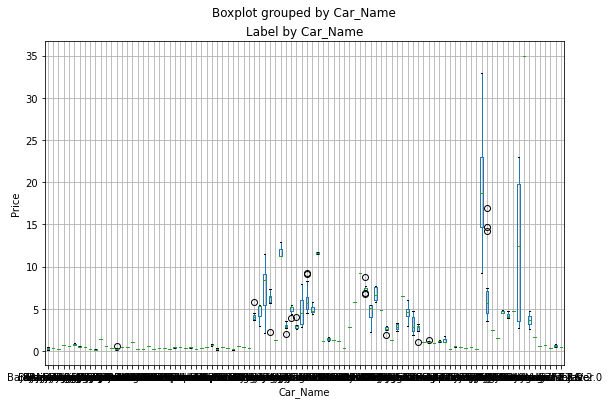

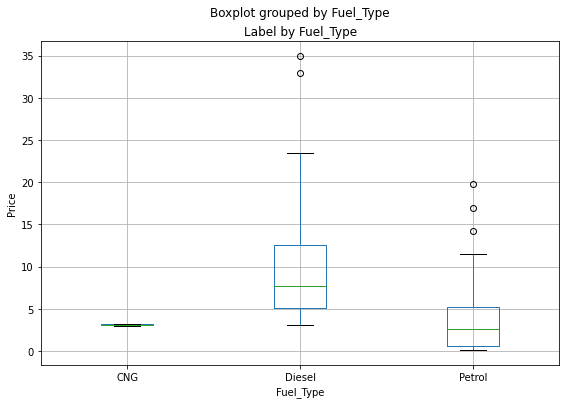

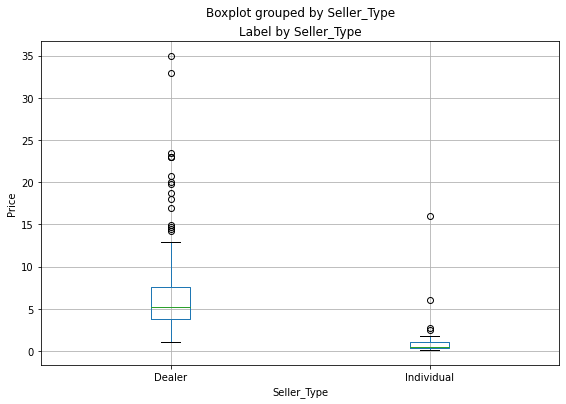

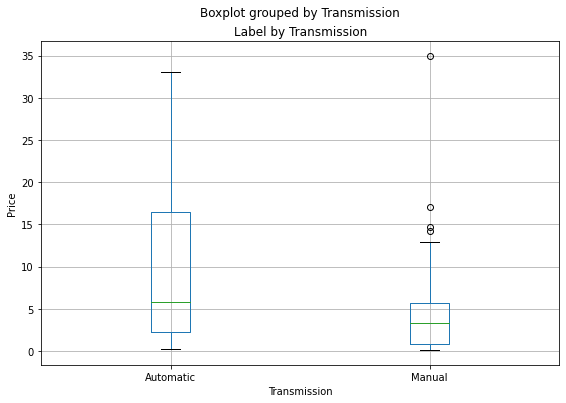

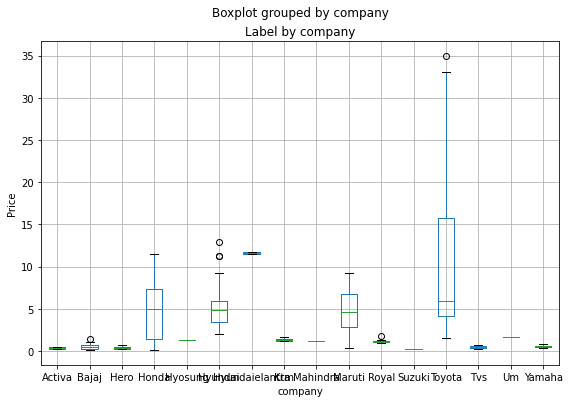

In [36]:
for col in cat_df:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Selling_Price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

Text(0.5, 1.0, 'Car Company Name vs Average Selling Price')

<Figure size 1440x432 with 0 Axes>

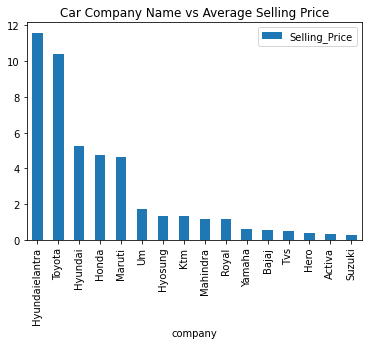

In [72]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(df.groupby(['company'])['Selling_Price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Selling Price')

In [76]:
corr_df.Selling_Price

Year             0.236141
Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
No_of_year      -0.236141
Name: Selling_Price, dtype: float64

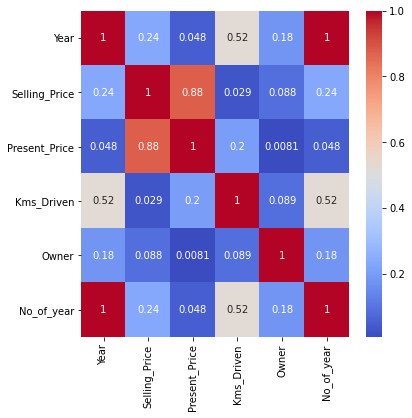

In [75]:
plt.figure(figsize=(6,6))
corr_df = df.corr()
sns.heatmap(abs(corr_df), annot=True,cmap='coolwarm')

In [77]:
df = pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'])

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
labelencoder=LabelEncoder()

In [40]:
cars_name = labelencoder.fit_transform(df['Car_Name'])
fueltype = labelencoder.fit_transform(df['Fuel_Type'])
Selltype = labelencoder.fit_transform(df['Seller_Type'])
trans = labelencoder.fit_transform(df['Transmission'])

In [78]:
x=df.drop(['Selling_Price','company','Car_Name'],axis = 1)
y = df[['Selling_Price']].values

In [80]:
x

,Year,Present_Price,Kms_Driven,Owner,No_of_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,7,0,0,1,1,0,0,1
1,2013,9.54,43000,0,8,0,1,0,1,0,0,1
2,2017,9.85,6900,0,4,0,0,1,1,0,0,1
3,2011,4.15,5200,0,10,0,0,1,1,0,0,1
4,2014,6.87,42450,0,7,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,5,0,1,0,1,0,0,1
297,2015,5.90,60000,0,6,0,0,1,1,0,0,1
298,2009,11.00,87934,0,12,0,0,1,1,0,0,1
299,2017,12.50,9000,0,4,0,1,0,1,0,0,1


In [ ]:
features = features.drop('Selling_Price')
features

Index(['Year', 'Present_Price', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol', 'Seller_Type_Dealer', 'Seller_Type_Individual',
       'Transmission_Automatic', 'Transmission_Manual'],
      dtype='object')

In [1]:
df_1.value_counts().unique().sum()

NameError: ignored

In [81]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(240, 12)
(61, 12)


In [82]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [83]:
reg.score(X_train, y_train)

0.8734200741252951

In [84]:
reg.coef_

array([[ 1.91564038e-01,  4.26479292e-01, -6.14426907e-06,
        -9.43575596e-01, -1.91564038e-01, -1.02542444e+00,
         1.46725833e+00, -4.41833885e-01,  5.70448690e-01,
        -5.70448690e-01,  7.17805280e-01, -7.17805280e-01]])

In [92]:
reg.intercept_

array([-382.28631931])

In [86]:
y_pred = reg.predict(X_test)

In [87]:
y_pred

array([[ 7.51749959],
       [-0.38136   ],
       [ 4.2559471 ],
       [ 9.00719207],
       [14.4269339 ],
       [ 4.87144495],
       [ 3.50800415],
       [ 1.44729345],
       [ 5.3451756 ],
       [ 4.61435641],
       [ 2.26758534],
       [ 1.6209573 ],
       [ 5.0502457 ],
       [ 7.5592941 ],
       [ 8.60637169],
       [13.98391877],
       [ 7.32792948],
       [ 4.23074458],
       [-0.43329109],
       [ 2.36959252],
       [ 4.98862734],
       [ 3.82566592],
       [ 6.43249291],
       [ 8.02059313],
       [-1.89494718],
       [ 1.92952344],
       [-0.82194725],
       [ 0.82000278],
       [ 0.0287008 ],
       [ 7.09763522],
       [ 3.56594643],
       [ 7.42982762],
       [ 0.72122573],
       [ 7.93570184],
       [ 3.51526022],
       [ 1.8051379 ],
       [ 5.54534144],
       [ 6.9878273 ],
       [-2.62961763],
       [ 9.08622868],
       [ 9.21468651],
       [20.02249841],
       [ 4.37997532],
       [ 3.85349481],
       [ 6.66353853],
       [ 9

In [93]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 2.1628715277894153
RMSE : 1.470670434798162


In [95]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test),(y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9144342972227798
Adjusted R2 :  0.8930428715284747


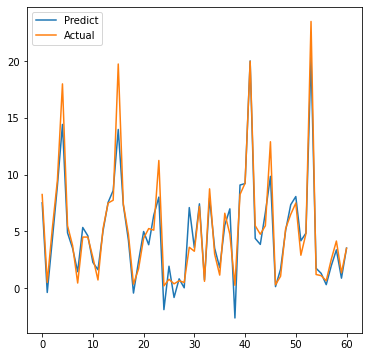

In [96]:
plt.figure(figsize=(6,6))
plt.plot(y_pred)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])

In [120]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.05, max_iter= 100)                       ## grid search : try different value of alpha and iteration

lasso.fit(X_train,y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=100,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [121]:
lasso.score(X_train,y_train)

0.8692203627130985

In [122]:
lasso.coef_

array([ 3.42255027e-01,  4.45774036e-01, -4.83072287e-06, -7.94962506e-02,
       -6.47525182e-02, -0.00000000e+00,  1.56140616e+00, -0.00000000e+00,
        8.79264118e-01, -0.00000000e+00,  7.56757619e-01, -4.18034621e-16])

In [137]:
## cross validation
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,50,100,0.0011]}
lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=2)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 30, 50, 100, 0.0011]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [138]:
print("The best fit alpha :",lasso_regressor.best_params_)
print("\nUsing",lasso_regressor.best_params_,"The neg_mean_squared_error is:",lasso_regressor.best_score_)

The best fit alpha : {'alpha': 0.01}

Using {'alpha': 0.01} The neg_mean_squared_error is: -3.4439497781757415


In [139]:
y_pred_lasso = lasso_regressor.predict(X_test)


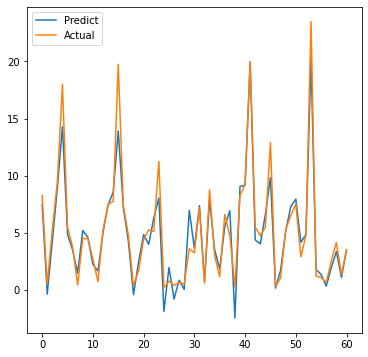

In [140]:
plt.figure(figsize=(6,6))
plt.plot(y_pred_lasso)
plt.plot(np.array(y_test))
plt.legend(["Predict","Actual"])

In [141]:
r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.9151870003416003
Adjusted R2 :  0.8939837504270003
